## Emission data exploring and cleaning
This file contains the major exploration and cleaning that has been done with the emission data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
emission_data = pd.read_csv('raw_data/Agriculture_total_emissions.csv', sep = ',', encoding = 'latin-1')
emission_data.head(3)


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EM,Emissions by sector,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1990,1990,gigagrams,569252.9048,A,"Aggregate, may include official, semi-official..."
1,EM,Emissions by sector,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1991,1991,gigagrams,571132.4325,A,"Aggregate, may include official, semi-official..."
2,EM,Emissions by sector,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1992,1992,gigagrams,578389.2402,A,"Aggregate, may include official, semi-official..."


In [37]:
emission_data_norm = pd.read_csv('raw_data/Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', sep = ',', encoding = 'latin-1')

## Explanation of agriculture emissions datafile

The emissions data in our dataset covers all emissions from agriculture. That is, both the emissions from crops and livestock production. There are different categories where the emissions come from but we are only interested in the total in this project. We will therefor clean out so that we only have the total emissions for agriculture. We are also only interested in CO2 emissions for this project and will therefore clean out the other types of emissions as well. Since we are studying emission on a continents level we will also only keep the data for the different continents.

## Data cleaning

#### Emission data number 1

In [36]:
def explain_df(df):
    print('The data contain(s) the following: ') 
    print(f'    area(s)    : {(df.Area.unique().tolist())}')
    print(f'    years      : {(df.Year.min())} - {emission_data.Year.max()}')
    print(f'    item(s)    : {(emission_data.Item.unique().tolist())}')
    print(f'    elements(s): {(df.Element.unique().tolist())}')
    print(f'    unit(s)    : {(df.Unit.unique().tolist())}')
    


The data contain(s) the following: 
    area(s)    : ['Africa', 'Northern America', 'South America', 'Asia', 'Europe', 'Oceania']
    years      : 1990 - 2010
    item(s)    : ['Agriculture total']
    elements(s): ['Emissions (CO2eq)']
    unit(s)    : ['gigagrams']


In [12]:
# Keep only agriculture total emissions
emissions = emission_data[emission_data.Item.str.contains('Agriculture total')]

In [102]:
# Keep only continent data
continents = ['Africa', 'Northern America', 'South America', 'Asia', 'Oceania', 'Europe']
emission_continent = emissions[emissions.Country.isin(continents)].rename({'Country': 'Area'}, axis=1)

emission_continent

,Country Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
277052,5100,Africa,1711,Agriculture total,7231,Emissions (CO2eq),1961,1961,Gigagrams,233438.4994,A
277053,5100,Africa,1711,Agriculture total,7231,Emissions (CO2eq),1962,1962,Gigagrams,237662.8732,A
277054,5100,Africa,1711,Agriculture total,7231,Emissions (CO2eq),1963,1963,Gigagrams,241883.7192,A
277055,5100,Africa,1711,Agriculture total,7231,Emissions (CO2eq),1964,1964,Gigagrams,248689.6524,A
277056,5100,Africa,1711,Agriculture total,7231,Emissions (CO2eq),1965,1965,Gigagrams,255912.4287,A
...,...,...,...,...,...,...,...,...,...,...,...
307686,5500,Oceania,1711,Agriculture total,7243,Emissions (CO2eq) from N2O,2012,2012,Gigagrams,116863.3514,A
307687,5500,Oceania,1711,Agriculture total,7243,Emissions (CO2eq) from N2O,2013,2013,Gigagrams,78615.5455,A
307688,5500,Oceania,1711,Agriculture total,7243,Emissions (CO2eq) from N2O,2014,2014,Gigagrams,89613.8889,A
307689,5500,Oceania,1711,Agriculture total,7243,Emissions (CO2eq) from N2O,2030,2030,Gigagrams,100990.5540,A


In [32]:
# Is any information missing?
print("Missing information in categorized dataset:\n", emission_data.isna().sum())

Missing information in categorized dataset:
 Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [21]:
# Save to pickle
emission_continent.to_pickle('./data/pickles/agriculture_emissions_continents.pkl')

#### Emission data number 2

We also have another emissions file with some categories to easier be able to determine differences in emission between crops and livestock production. This dataset already has countries filtered out and only contains the different continents.

In [3]:
categorized_data = pd.read_csv('raw_data/Emission_data.csv', sep = ',', encoding = 'latin-1')
categorized_data

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1961,1961,gigagrams,6404.6437,A,"Aggregate, may include official, semi-official..."
1,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1962,1962,gigagrams,6841.1636,A,"Aggregate, may include official, semi-official..."
2,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1963,1963,gigagrams,7246.6931,A,"Aggregate, may include official, semi-official..."
3,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1964,1964,gigagrams,7400.0959,A,"Aggregate, may include official, semi-official..."
4,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1965,1965,gigagrams,7668.5256,A,"Aggregate, may include official, semi-official..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,EI,Emissions intensities,5500,Oceania,5510,Production,1035,"Meat, pig",2012,2012,tonnes,500824.0000,A,"Aggregate, may include official, semi-official..."
8156,EI,Emissions intensities,5500,Oceania,5510,Production,1035,"Meat, pig",2013,2013,tonnes,503040.0000,A,"Aggregate, may include official, semi-official..."
8157,EI,Emissions intensities,5500,Oceania,5510,Production,1035,"Meat, pig",2014,2014,tonnes,506860.0000,A,"Aggregate, may include official, semi-official..."
8158,EI,Emissions intensities,5500,Oceania,5510,Production,1035,"Meat, pig",2015,2015,tonnes,514315.0000,A,"Aggregate, may include official, semi-official..."


The different _items_ in this dataset are the following:

In [6]:
categorized_data['Item'].unique()

array(['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle',
       'Milk, whole fresh cow', 'Meat, goat', 'Milk, whole fresh goat',
       'Meat, buffalo', 'Milk, whole fresh buffalo', 'Meat, sheep',
       'Milk, whole fresh sheep', 'Milk, whole fresh camel',
       'Meat, chicken', 'Eggs, hen, in shell', 'Meat, pig'], dtype=object)

**For now we will stick to the first dataset discussed in this notebook since we are more interested in the total agriculture emissions.**

Let's plot the _Agriculture, total_ emissions from the dataset 1. Let's also make use of the population data so we can normalize the data on the population of a given continent or the world.

In [ ]:
# Create population data
population = pd.read_csv('./data/csv/pop_continents.csv')
# Remove year 1961 to match with all the emission data 
population = population[population['Year'] != 1961] 

area_year_population = population.groupby(['Area', 'Year']).agg({'Value':'sum','Unit':'first'}).reset_index()
world_year_population = area_year_population.groupby('Year').agg({'Value':'sum'}).reset_index()

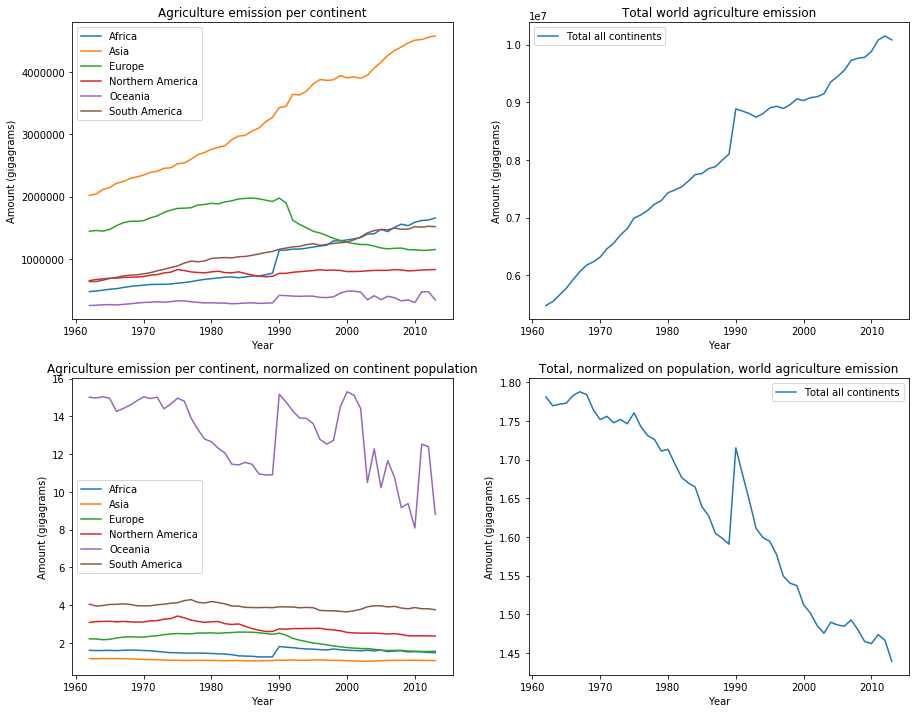

In [100]:
import warnings
warnings.filterwarnings('ignore')

area_year_emission = emission_continent.groupby(['Area', 'Year']).agg({'Value':'sum','Unit':'first'}).reset_index()
area_year_emission = area_year_emission[(area_year_emission['Year'] <= 2013) & (area_year_emission['Year'] >= 1962)]
tmp = []
fig = plt.figure(figsize = (15,12))

for area in area_year_emission.Area.unique():
    plt.subplot(2,2,3)
    plt.plot(area_year_emission[area_year_emission['Area'] == area].Year.values, 
             area_year_emission[area_year_emission['Area'] == area].Value.values/
             area_year_population[area_year_population['Area'] == area].Value.values)
    
    plt.subplot(2,2,1)
    plt.plot(area_year_emission[area_year_emission['Area'] == area].Year.values, 
             area_year_emission[area_year_emission['Area'] == area].Value.values)
    
plt.subplot(2,2,1)
plt.legend(area_year_emission.Area.unique())
plt.title('Agriculture emission per continent')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.subplot(2,2,3)
plt.legend(area_year_emission.Area.unique())
plt.title('Agriculture emission per continent, normalized on continent population')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

# Global yearly emission
total_year_emission = area_year_emission.groupby('Year').agg({'Value':'sum'}).reset_index()
total_year_emission = total_year_emission[total_year_emission['Year'] <= 2013]

plt.subplot(2,2,2)
plt.plot(total_year_emission['Year'].values,
        total_year_emission['Value'].values)
plt.legend(['Total all continents'])
plt.title('Total world agriculture emission')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.subplot(2,2,4)
plt.plot(total_year_emission['Year'].values,
        total_year_emission['Value'].values/world_year_population['Value'].values)
plt.legend(['Total all continents'])
plt.title('Total, normalized on population, world agriculture emission')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.show()

##### Emission area plot 
We can see that _Asia_ is by far the worst when it comes to total agriculture emissions but the best if you normalize by their population _Oceania_ being the best. However, we do not know how much of this agriculture a certain area exports and it would be interesting to normalize the data on population count to get a better idea of how each continent differs.

In [111]:
# Correlations
corr = np.corrcoef(x = total_year_emission.Value.values, y = world_year_population.Value.values)[0,1]
print(f'Correlation between agriculture emission and population is {round(corr,2)}')

Correlation between agriculture emission and population is 0.99


In [20]:
sheep_prod = categorized_data[categorized_data.Item.str.contains('sheep')]

sheep_data = sheep_prod.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'})
sheep_data['Item'] = 'Sheep'

In [21]:
sheep_data.reset_index()

,Area,Element,Year,Unit,Value,Item
0,Africa,Emissions (CO2eq),1961,gigagrams,26107.8934,Sheep
1,Africa,Emissions (CO2eq),1962,gigagrams,25742.8884,Sheep
2,Africa,Emissions (CO2eq),1963,gigagrams,25928.7068,Sheep
3,Africa,Emissions (CO2eq),1964,gigagrams,26531.4870,Sheep
4,Africa,Emissions (CO2eq),1965,gigagrams,27693.8435,Sheep
...,...,...,...,...,...,...
667,South America,Production,2012,tonnes,290741.0000,Sheep
668,South America,Production,2013,tonnes,283684.0000,Sheep
669,South America,Production,2014,tonnes,276685.0000,Sheep
670,South America,Production,2015,tonnes,264212.0000,Sheep
